Crecion de modelos para ambos DF
(se utlizan ambos solo para contrstar y comparar)

In [36]:
#_______________Requerimientos_______________
#Separar los datos
from sklearn.model_selection import train_test_split

#Regresión Logística
from sklearn.linear_model import LogisticRegression

#Evaluar el modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

#______Modelos_____
#KNN
from sklearn.neighbors import KNeighborsClassifier
#Árboles de Decisión 
from sklearn.tree import DecisionTreeClassifier
#Bosque Aleatorio 
from sklearn.ensemble import RandomForestClassifier
#Ajuste de parametros
from sklearn.model_selection import GridSearchCV

In [14]:
import pandas as pd
# csv con datos eliminados  
df = pd.read_csv(r"Datos\diabetes_limpios.csv")

#Dividir datos en 70% entrenamiento 15% prueva y 15% validación

In [16]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# 70% entrenamiento, 30% restante para validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# 50% de X_temp va a validación y 50% a prueba (15% cada uno)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

## Modelos y matrices


🔹 Regresión Logística:
Accuracy: 0.8000
Precision: 0.7500
Recall: 0.6000


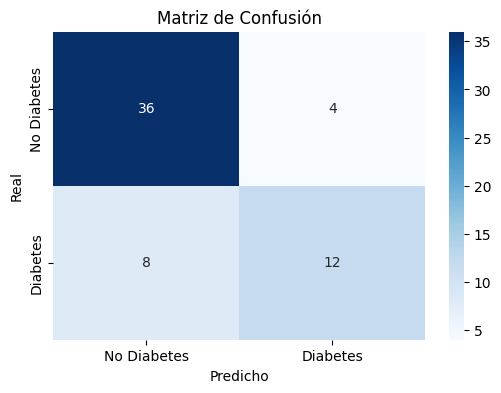


🔹 KNN:
Accuracy: 0.7667
Precision: 0.6875
Recall: 0.5500


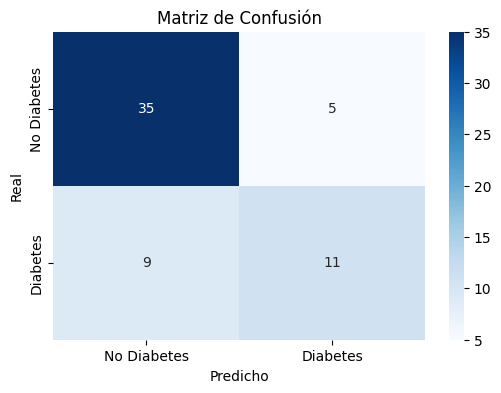


🔹 Árbol de Decisión:
Accuracy: 0.7833
Precision: 0.6667
Recall: 0.7000


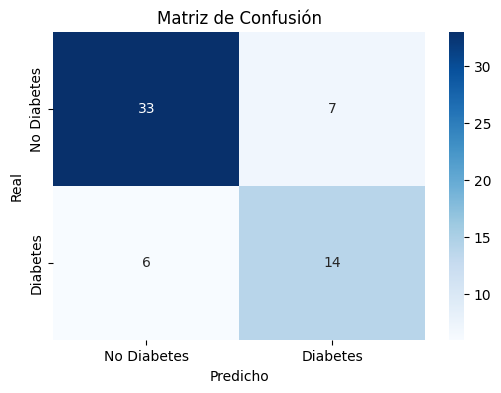


🔹 Random Forest:
Accuracy: 0.8000
Precision: 0.7500
Recall: 0.6000


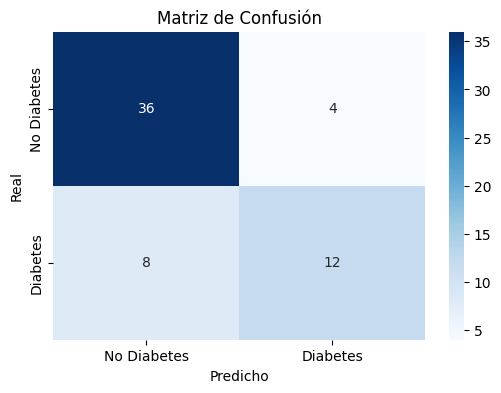

In [38]:
# Modelos
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=200, solver='liblinear'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Árbol de Decisión": DecisionTreeClassifier(max_depth=4, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Entrenar y evaluar cada modelo
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print(f"\n🔹 {nombre}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.title("Matriz de Confusión")
    plt.show()
    